Lets build a harmonic oscillator without solving the differential equation. This is a classic example of how a computer can help you to solve problems

In [1]:
#include the usuals
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math as math

In [2]:
#Lets define the spring 
def force(iX,iK=0.1):
    return -1*iX*iK

Now we are going to iterate the function without solving the way we are going to do this is by solving the equations of motion. To this lets say we have a force equation like the spring $m\frac{d^{2}x}{dt^2}= kx$. Now lets consider a function from its taylor series we can write $x(t)=x(t_{0})+(t-t_{0})\frac{dx}{dt}+\frac{1}{2}\frac{dx^{2}}{dt^{2}}$ and so what we can do is iterate. The way we do this is, we have $\frac{dx^{2}}{dt^2}$ and we can define $\frac{dx}{dt} = \frac{dx}{dt}(t-t_{0})+(t-t_{0})\frac{d^{2}x}{dt^{2}}$

In [3]:
#lets do a for loop
#Now lets pick a configuration
t=[]
x=[]
dt=0.01
pXOld=1
pdXOld=0
for i0 in range(10000):
    pT=i0*dt
    dX=force(pXOld)
    pdXOld=pdXOld+dt*dX
    pXOld=pXOld+dt*pdXOld+0.5*dt*dt*dX
    t.append(pT)
    x.append(pXOld)
#Now lets vary the time iteration
t1=[]
x1=[]
dt=0.1
pXOld=1
pdXOld=0
for i0 in range(1000):
    pT=i0*dt
    dX=force(pXOld)
    pdXOld=pdXOld+dt*dX
    pXOld=pXOld+dt*pdXOld+0.5*dt*dt*dX
    t1.append(pT)
    x1.append(pXOld)

<IPython.core.display.Javascript object>


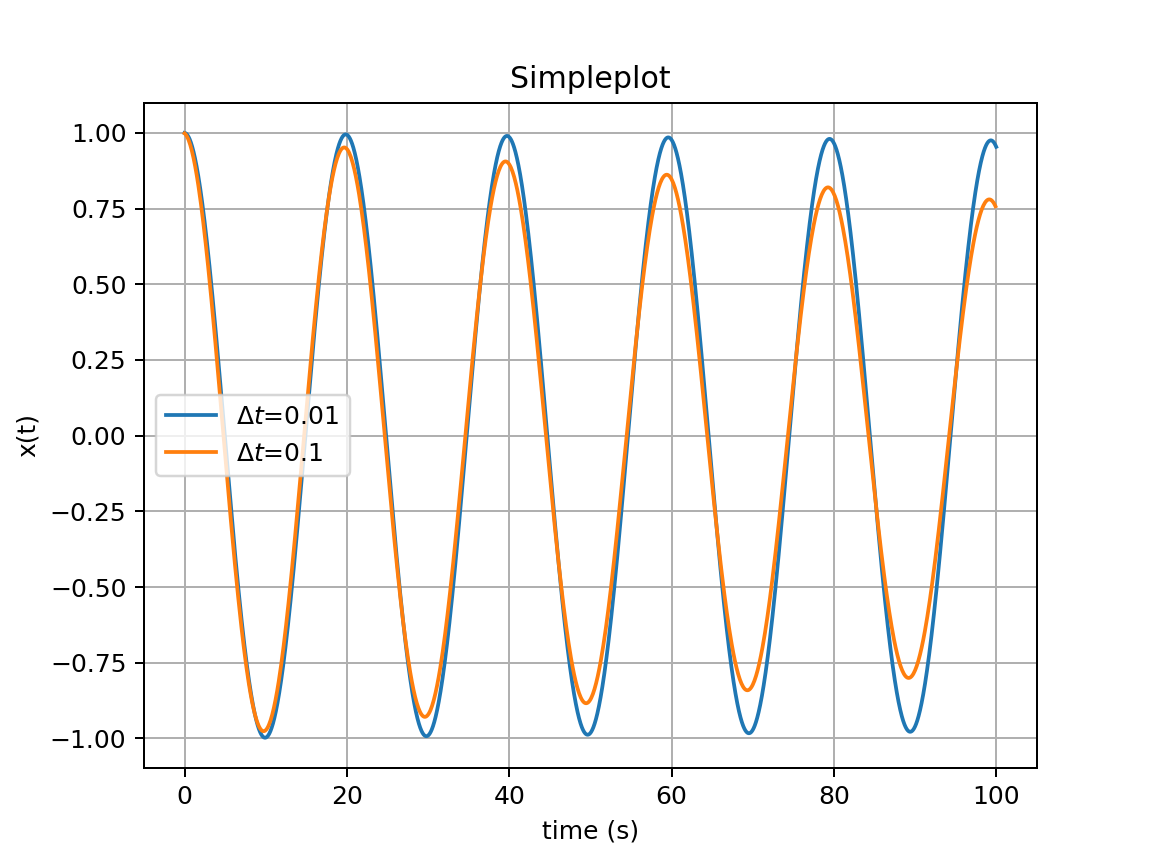

In [4]:
fig, ax = pl.subplots()
ax.plot(t, x,label='$\Delta t$=0.01')
ax.plot(t1,x1,label='$\Delta t$=0.1')
ax.set(xlabel='time (s)', ylabel='x(t)',title='Simpleplot')
ax.grid()
pl.legend()
pl.show()

Now what if we modify our force so that its not a haromnic oscillator.  

<IPython.core.display.Javascript object>


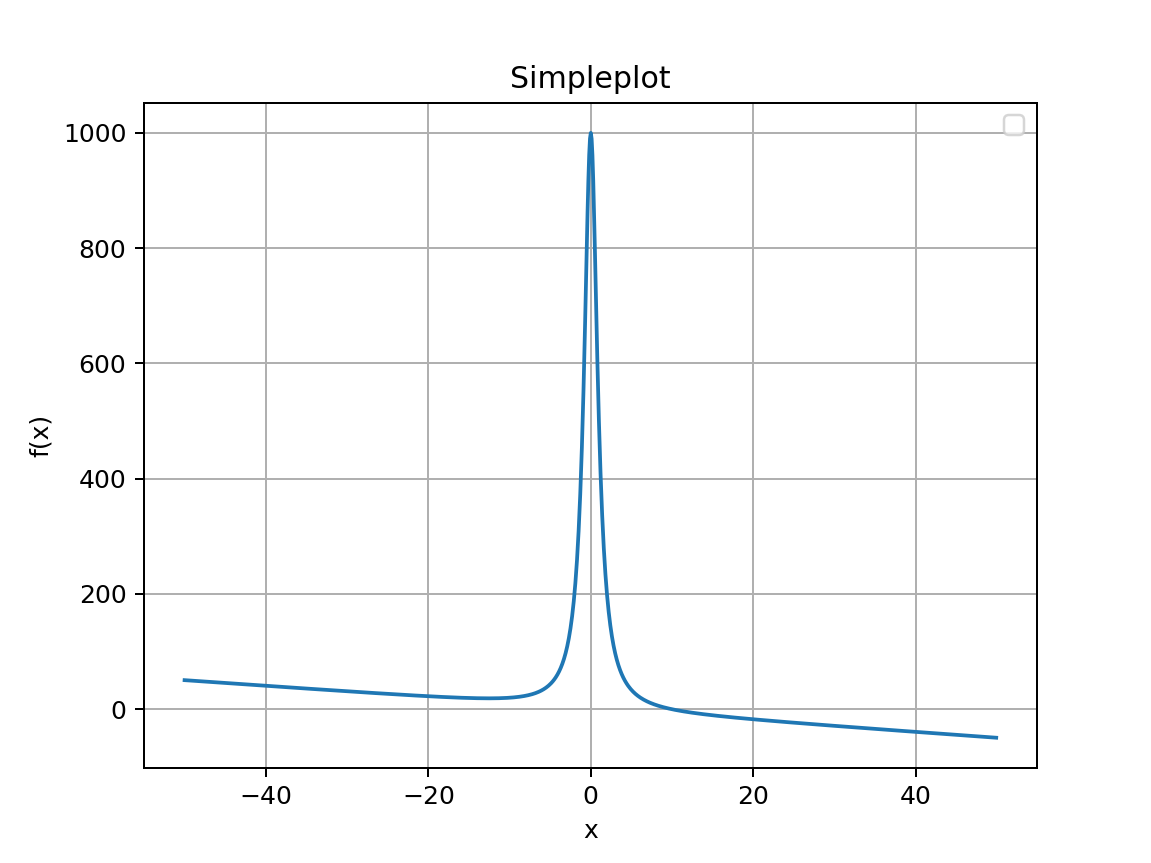

No handles with labels found to put in legend.


In [29]:
def force_mod(iX,iK=1,iK1=1000):
        return (-iK*iX+iK1/(iX*iX+1))
#Now lets check the force
x=[]
f=[]
for i0 in range(1000):
    pX=i0*0.1-500*0.1
    pF=force_mod(pX)
    x.append(pX)
    f.append(pF)

fig, ax = pl.subplots()
ax.plot(x, f)
ax.set(xlabel='x', ylabel='f(x)',title='Simpleplot')
ax.grid()
pl.legend()
pl.show()

<IPython.core.display.Javascript object>


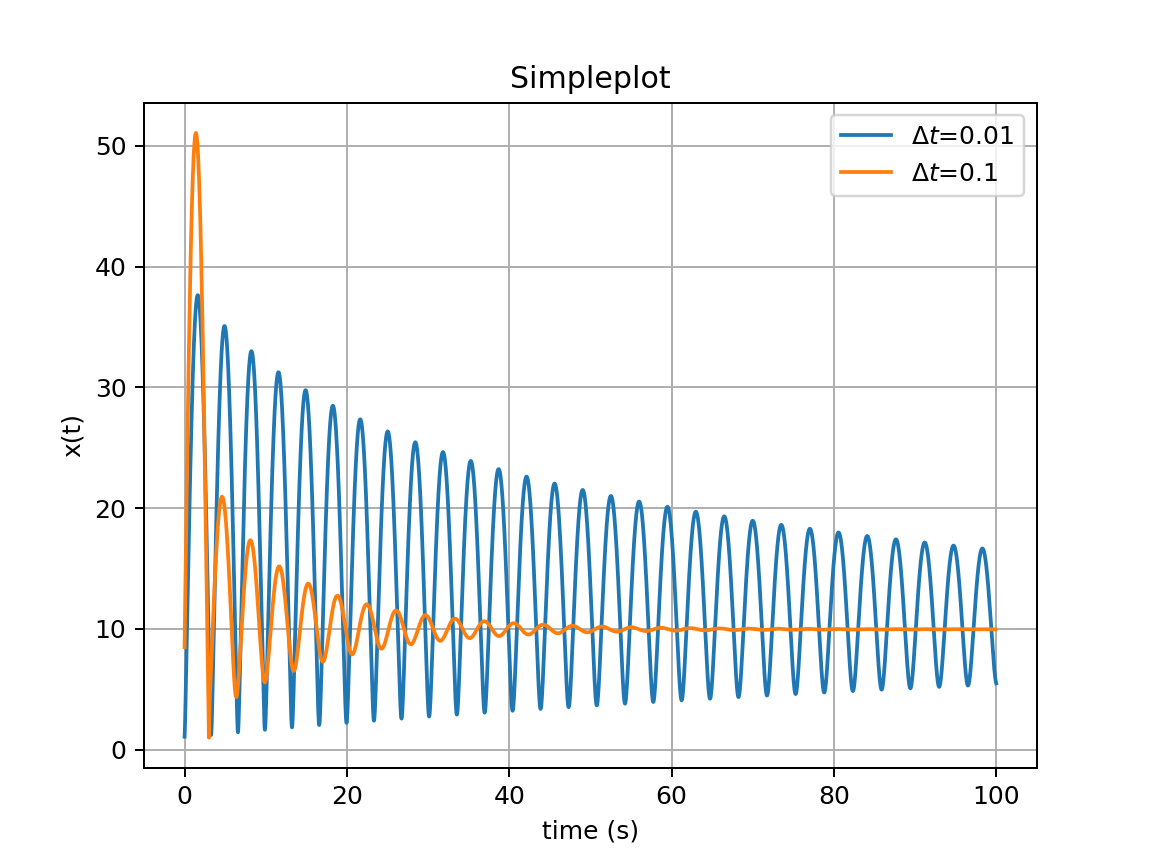

In [30]:
#Ok Lets take a look at what we get
#Now lets pick a configuration
t=[]
x=[]
dt=0.01
pXOld=1
pdXOld=0
for i0 in range(10000):
    pT=i0*dt
    dX=force_mod(pXOld)
    pdXOld=pdXOld+dt*dX
    pXOld=pXOld+dt*pdXOld+0.5*dt*dt*dX
    t.append(pT)
    x.append(pXOld)
#Now lets vary the time iteration
t1=[]
x1=[]
dt=0.1
pXOld=1
pdXOld=0
for i0 in range(1000):
    pT=i0*dt
    dX=force_mod(pXOld)
    pdXOld=pdXOld+dt*dX
    pXOld=pXOld+dt*pdXOld+0.5*dt*dt*dX
    t1.append(pT)
    x1.append(pXOld)
fig, ax = pl.subplots()
ax.plot(t, x,label='$\Delta t$=0.01')
ax.plot(t1,x1,label='$\Delta t$=0.1')
ax.set(xlabel='time (s)', ylabel='x(t)',title='Simpleplot')
ax.grid()
pl.legend()
pl.show()

Ok, so lets do a more interesting function. What if our force is a function of not just $x$, but also $\frac{dX}{dt}$. Well how do we solve that numerically? Acutally its straight forward. We just have
\begin{eqnarray}
\frac{d^{2}x}{dt^2} & = & -k_{0}x+k_{1}\frac{dx}{dt} \\
\frac{dx}{dt}(t)    & = & \frac{dx}{dt}(t_{0})+(t-t_{0})\frac{d^{2}x}{dt^2}(t_{0}) \\
x(t)                & = & x(t_{0})+(t-t_{0})\frac{dx}{dt}(t_{0})+\frac{1}{2}(t-t_{0})^{2}\frac{d^{2}x}{dt^2}(t_{0})
\end{eqnarray}

and we can generalize this to any scenario provided we have the force equation
\begin{eqnarray}
\frac{d^{2}x}{dt^2} & = & f\left(x,\frac{dx}{dt}\right)\\
\frac{dx}{dt}(t)    & = & \frac{dx}{dt}(t_{0})+(t-t_{0})\frac{d^{2}x}{dt^2}(t_{0}) \\
x(t)                & = & x(t_{0})+(t-t_{0})\frac{dx}{dt}(t_{0})+\frac{1}{2}(t-t_{0})^{2}\frac{d^{2}x}{dt^2}(t_{0})
\end{eqnarray}


In [44]:
#now lets be a little bit smart
def force_damp(iX,idX,iK0=1,iK1=0.1):
        return (-iK0*iX-iK1*idX)

def array_damp(iDT=0.1,iN=10000,iK0=1,iK1=0.1,iX0=1,idX0=0):
    t=[]
    x=[]
    dt=iDT
    pXOld=iX0
    pdXOld=idX0
    for i0 in range(iN):
        pT=i0*dt
        dX=force_damp(pXOld,pdXOld,iK0,iK1)
        pdXOld=pdXOld+dt*dX
        pXOld=pXOld+dt*pdXOld+0.5*dt*dt*dX
        t.append(pT)
        x.append(pXOld)
    return t,x

<IPython.core.display.Javascript object>


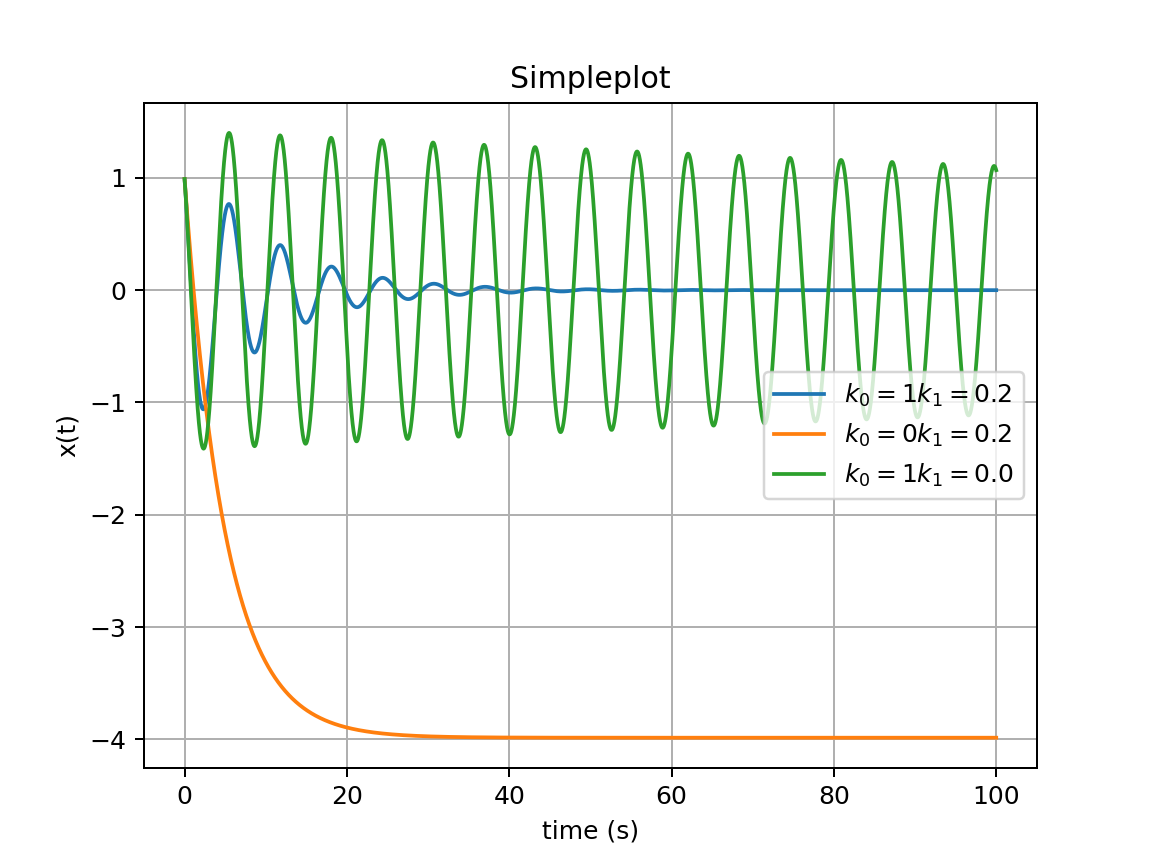

In [52]:
fig, ax = pl.subplots()
t1,x1=array_damp(0.01,10000,1,0.2,1,-1)
t2,x2=array_damp(0.01,10000,0,0.2,1,-1)
t3,x3=array_damp(0.01,10000,1,0.0,1,-1)
ax.plot(t1,x1,label='$k_{0}=1 k_{1}=0.2$')
ax.plot(t2,x2,label='$k_{0}=0 k_{1}=0.2$')
ax.plot(t3,x3,label='$k_{0}=1 k_{1}=0.0$')
ax.set(xlabel='time (s)', ylabel='x(t)',title='Simpleplot')
ax.grid()
pl.legend()
pl.show()